# Flower types classification

## 1. Get the data

The data files are stored in a `data/` folder, we check that it exists.

ℹ️ `pathlib` is a Python standard library, useful to access files in a mutli-OS compatible manner.

In [1]:
from pathlib import Path

data_folder_path = Path('./data')
if not data_folder_path.exists():  # check if the data/ folder exists
    print(f'Error: the folder {data_folder_path} doesn\'t exist')

### 1.1. Get the images labels

We use `scipy` to load the `imagelabels.mat` file located in the `data/` folder, and extract a list giving the images labels.

☝️ images labels = target array

In [2]:
import scipy.io

image_labels_mat = scipy.io.loadmat(data_folder_path / 'imagelabels.mat')
labels = image_labels_mat.get('labels')[0]
print(f'Images labels: {labels} ({len(labels)} values, {len(set(labels))} different class)')

Images labels: [77 77 77 ... 62 62 62] (8189 values, 102 different class)


### 1.2. Get the train/validation/test images ids

We use `scipy` to load the `setid.mat` file located in the `data/` folder, a list giving the train/validation/test images ids.

In [3]:
# load ids of train/validation/test files
set_id_mat = scipy.io.loadmat(data_folder_path / 'setid.mat')
train_ids = set_id_mat.get('trnid')[0]
validation_ids = set_id_mat.get('valid')[0]
test_ids = set_id_mat.get('tstid')[0]

print(f'{len(train_ids)} examples in original training set (ids: {train_ids})')
print(f'{len(validation_ids)} examples in original validation set (ids: {validation_ids})')
print(f'{len(test_ids)} examples in original test set (ids: {test_ids})')

1020 examples in original training set (ids: [6765 6755 6768 ... 8026 8036 8041])
1020 examples in original validation set (ids: [6773 6767 6739 ... 8028 8008 8030])
6149 examples in original test set (ids: [6734 6735 6737 ... 8044 8045 8047])


### 1.3. Get the train/validation/test sets

In [4]:
flower_images_path = data_folder_path / 'flower_images'
if not flower_images_path.exists():  # check if the flower_images/ folder exists
    print(f'Error: the folder {flower_images_path} doesn\'t exist')

In [5]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sys

def load_set(set_ids):
    """
    This function takes as an input a list of images ids and returns:
    - the corresponding images list (X)
    - the corresponding labels list (y)
    - the corresponding filenames list
    """
    X = []  # images
    y = []  # labels
    filenames = []
    
    for image_id in set_ids:
        filename = f'image_{image_id:05d}.jpg'
        X.append(plt.imread(flower_images_path / filename))
        y.append(labels[image_id - 1])
        filenames.append(filename)
        print(f'\rLoaded {len(X)}/{len(set_ids)} images...', end='')
        sys.stdout.flush()  # to force live print
    
    print()
    
    return shuffle(X, y, filenames, random_state=42)

In [6]:
# X_train, y_train, filenames_train = load_set(train_ids)
# X_validation, y_validation, filenames_validation = load_set(validation_ids)
# X_test, y_test, filenames_test = load_set(test_ids)

X_train, y_train, filenames_train = load_set(train_ids[:200])
X_validation, y_validation, filenames_validation = load_set(validation_ids[:200])
X_test, y_test, filenames_test = load_set(test_ids[:200])

Loaded 200/200 images...
Loaded 200/200 images...
Loaded 200/200 images...


### 1.4. Sanity check

In [7]:
def plot_nine_check_images(X, y, filenames, set_name):
    print(f'- {set_name} set sanity check')
    
    _, ax = plt.subplots(3, 3, figsize=(10, 10))
    for i in range(9):
        ax[i // 3][i % 3].imshow(X[i])
        ax[i // 3][i % 3].set_title(f'{filenames[i]}\nlabel: {y[i]}')
    plt.show()

- train set sanity check


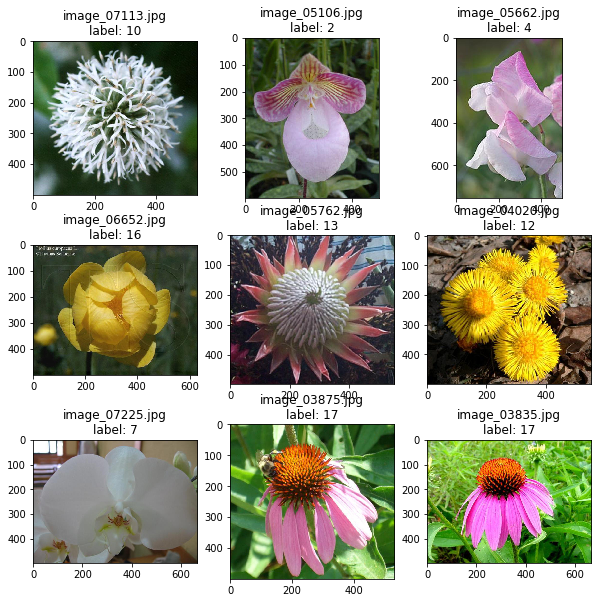

- validation set sanity check


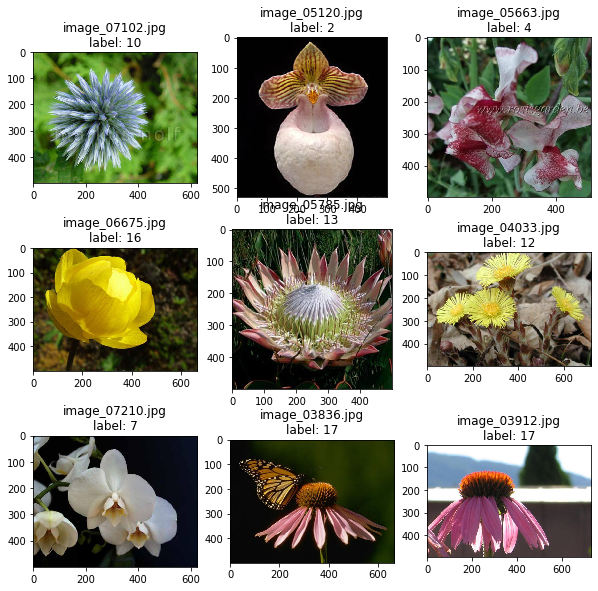

- test set sanity check


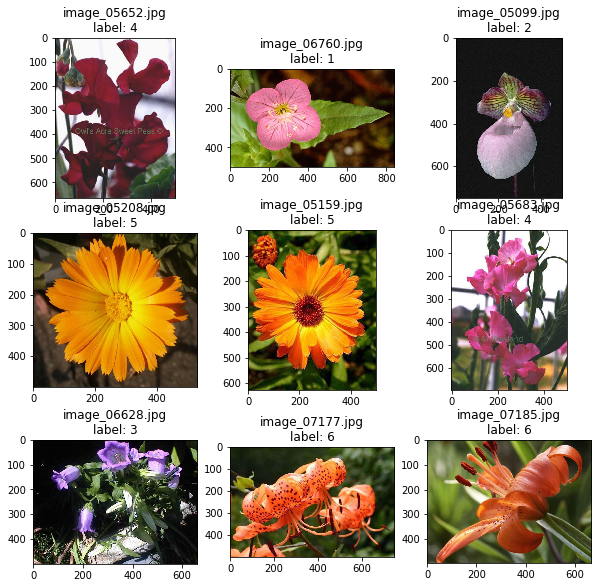

In [8]:
plot_nine_check_images(X_train, y_train, filenames_train, 'train')
plot_nine_check_images(X_validation, y_validation, filenames_validation, 'validation')
plot_nine_check_images(X_test, y_test, filenames_test, 'test')

## 2. Define the model

**🚧 Work in progress ...**

In [9]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 102 classes
predictions = Dense(22, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

## 3. Train the model

**🚧 Work in progress ...**

### 3.1. Format the data for Keras

In [20]:
n = 100

In [21]:
import numpy as np

def format_x_for_keras(X):
    X_new = []

    for image in X:
        X_new.append(image[:500, :500, :])

    return np.stack(X_new, axis=0)

X_train_keras = format_x_for_keras(X_train[:n])
print(X_train_keras.shape)
X_validation_keras = format_x_for_keras(X_validation[:n])

(100, 500, 500, 3)


In [22]:
from keras.utils.np_utils import to_categorical

def format_y_for_keras(y):
    y_new = np.stack(y, axis=0)
    return to_categorical(y_new)

y_train_keras = format_y_for_keras(y_train[:n])
print(y_train_keras.shape)
y_validation_keras = format_y_for_keras(y_validation[:n])

(100, 22)


### 3.2. Do the training

In [ ]:
# train the model on the new data for a few epochs
model.fit(X_train_keras, y_train_keras, steps_per_epoch=10000, epochs=10), #validation_data=(X_validation_keras[:10], y_validation_keras[:10]))

Epoch 1/10
